In [1]:
import ikpy.chain
import numpy as np
import ikpy.utils.plot as plot_utils
import ikpy.urdf.utils as urdf_utils
import math

In [14]:
my_chain = ikpy.chain.Chain.from_urdf_file("../../urdf/chungus.urdf")

/home/ncbernar/.pyenv/versions/3.12.7/envs/robotics/lib/python3.12/site-packages/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


In [35]:
target_position = [0.42396, 0.03687905, 0.04698095]
# target_position = [0.2, .37, 0]

In [36]:
print("The angles of each joints are : ", (my_chain.inverse_kinematics(target_position) * 180) / math.pi)

The angles of each joints are :  [-2.45998840e-14 -6.32340850e+00 -9.58131393e+01  2.55688510e+02
  0.00000000e+00]


In [25]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_position))
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_position))

Computed position vector : [-0.2   0.37  0.  ], original position vector : [-0.2, 0.37, 0]


(-2.0, 2.0)

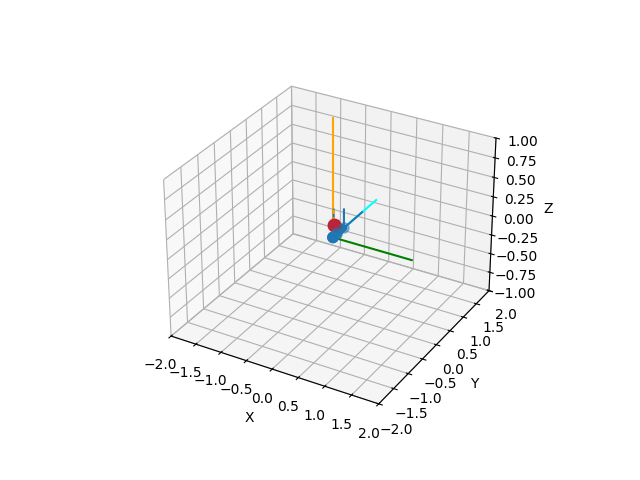

In [26]:
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_position), ax, target=target_position)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

In [8]:
print(urdf_utils.get_urdf_tree('./chungus.URDF', 'base_link'))

(<graphviz.graphs.Digraph object at 0x7cf3732c0740>, URDF Link: base_link;
)


In [2]:
import numpy as np
import math


In [3]:
def generate_rotational_matrix(roll, pitch, yaw):
    c_roll = np.cos(roll)
    c_pitch = np.cos(pitch)
    c_yaw = np.cos(yaw)
    
    s_roll = np.sin(roll)
    s_pitch = np.sin(pitch)
    s_yaw = np.sin(yaw)
    
    row_mat_x = np.array([
        [1, 0, 0], 
        [0, c_roll, -s_roll], 
        [0, s_roll, c_roll]
    ])
    row_mat_y = np.array([
        [c_pitch, 0, s_pitch],
        [0, 1, 0],
        [-s_pitch, 0, c_pitch]
    ])
    row_mat_z = np.array([
        [c_yaw, -s_yaw, 0],
        [s_yaw, c_yaw, 0],
        [0, 0, 1]
    ])

    return row_mat_x

In [4]:
rotation_cr = generate_rotational_matrix(math.pi, 0, 0)
print(rotation_cr)

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00]]


In [5]:
translation_cr = np.array([0, 0, 1.17])

In [6]:

# Create a 4x4 transformation matrix
T_cr = np.eye(4)  # Start with an identity matrix
T_cr[:3, :3] = rotation_cr # Assign rotation part
T_cr[:3, 3] = translation_cr   # Assign translation part

print(T_cr)

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16  0.0000000e+00]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00  1.1700000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [33]:
BANANA_CONSTANT = 0.01905
x = 423.96
y = -36.86 - BANANA_CONSTANT
z = 1123 + BANANA_CONSTANT
vector_c = np.array([x / 1000, y / 1000, z / 1000 , 1])

In [34]:
vector_r = np.linalg.inv(T_cr) @ vector_c
print(vector_r)

[0.42396    0.03687905 0.04698095 1.        ]
